### Author = 'Timothy McDonough'
### Email = 'timothylmcdonough@gmail.com'

### OSEMN Pipeline

I’ll be following a typical data science pipeline, which is call “OSEMN” (pronounced awesome).

  1. Obtaining the data is the first approach in solving the problem.

  2. Scrubbing or cleaning the data is the next step. This includes data imputation of missing or invalid data        and fixing feature names.

  3. Exploring the data will follow right after and allow further insight of what our dataset contains. Looking        for any outliers or weird data. Understanding the relationship each explanatory variable has with the            response variable resides here and we can do this with a correlation matrix.

  4. Modeling the data will give us our predictive power on whether an employee will leave.

  5. Interpreting the data is last. With all the results and analysis of the data, what conclusion is made? What      factors contributed most to employee turnover? What relationship of variables were found?

## Part 1: Obtaining the Data

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
#move working directory to correct location
os.chdir('/Users/timothylmcdonough/DSDJ/NYC_AirBnB/Data')

In [3]:
#Read the analytics csv file and store our dataset into a dataframe called "NYC_df"
NYC_df = pd.read_csv('NYC_2019.csv', index_col=None)

In [4]:
#create dataframe for Bronx only
Bronx_df = pd.DataFrame(NYC_df[NYC_df['neighbourhood_group'] == 'Bronx'])

## Part 2: Scrubbing the Data

Examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.

In [5]:
#A look at head of dataframe for a top level overview of the daa
Bronx_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2019-07-04,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,2019-06-30,1.45,3,323
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,NaN,7,349
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,2019-06-27,0.50,13,365
309,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,2019-01-02,0.35,2,346


In [6]:
# Check to see if there are any missing values in our data set
Bronx_df.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

There appear to be some empty values for "name", "host_name", "last_review", and "reviews_per_month" features.  We will keep this in mind for possible future scrubbing.

Feature names appear to be appropriately labeled, hence no further renaming of the features is required.

In [7]:
# Move the reponse variable "price" to the front of the table since this will be the variable of focus
front = Bronx_df['price']
Bronx_df.drop(labels=['price'], axis=1,inplace = True)
Bronx_df.insert(0, 'price', front)
Bronx_df.head()

,price,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
171,40,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,1,219,2019-07-04,2.04,3,353
207,45,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,1,138,2019-06-30,1.45,3,323
260,90,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,2,0,NaN,NaN,7,349
261,105,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,2,38,2019-06-27,0.50,13,365
309,90,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,30,4,2019-01-02,0.35,2,346


## Part 3: Data Exploration
  ### 3a. Statistical Overview

Lets look at the size of the dataset:

In [8]:
Bronx_df.shape

(1091, 16)

The data set has 16 features and 1,091 rows of data

Now lets examine the types of data in the set:

In [12]:
Bronx_df.dtypes

price                               int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Here is a statistical overview of the dataset:

In [13]:
Bronx_df.describe()

,price,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1091.000000,1.091000e+03,1.091000e+03,1091.000000,1091.000000,1091.000000,1091.000000,876.000000,1091.000000,1091.000000
mean,87.496792,2.273492e+07,1.056099e+08,40.848305,-73.884552,4.560953,26.004583,1.837831,2.233731,165.758937
std,106.709349,1.023402e+07,8.707959e+07,0.026717,0.032818,15.631792,42.214774,1.673284,2.370576,135.247098
min,0.000000,4.409600e+04,1.222100e+04,40.800110,-73.931900,1.000000,0.000000,0.020000,1.000000,0.000000
25%,45.000000,1.617488e+07,2.167977e+07,40.826645,-73.911055,1.000000,1.000000,0.480000,1.000000,37.000000
50%,65.000000,2.387930e+07,9.132072e+07,40.846150,-73.892540,2.000000,9.000000,1.380000,1.000000,148.000000
75%,99.000000,3.189909e+07,1.791702e+08,40.869605,-73.858425,3.000000,32.000000,2.790000,2.000000,313.500000
max,2500.000000,3.644225e+07,2.738773e+08,40.913060,-73.781580,365.000000,321.000000,10.340000,37.000000,365.000000


  ### Correlation Matrix & Heatmap
Summary:
Here we see a strong between price and host ID as well as ID.  Not useful as these IDs are randomized.  There is however, a strong positive correlation between price and number of reviews as well as reviews per month.  Could be that rentals who have more reviews are more trustworthy and thus can charge a higher price to rent.  Something to keep in mind.

Finally, real estate has prices have historically been tied to location which are categorical variables.  Our features of "neighbourhood_group" and "neighbourhood" will help add to our location analysis.  We will perform one hot encoding to these variables later on so they may be of use to us.

,price,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.001323,0.004803,0.045466,0.047551,-0.031339,-0.061298,-0.010145,0.001749,0.068172
id,0.001323,1.000000,0.597003,-0.027446,0.074211,-0.057779,-0.462177,0.285146,-0.013776,-0.060311
host_id,0.004803,0.597003,1.000000,-0.007540,0.067266,-0.088885,-0.250485,0.247580,-0.179417,-0.001495
latitude,0.045466,-0.027446,-0.007540,1.000000,0.343823,0.067027,-0.030246,-0.055174,0.027576,0.047861
longitude,0.047551,0.074211,0.067266,0.343823,1.000000,-0.060248,-0.004649,0.054774,0.076329,0.071437
minimum_nights,-0.031339,-0.057779,-0.088885,0.067027,-0.060248,1.000000,-0.078388,-0.174082,0.074049,0.069003
number_of_reviews,-0.061298,-0.462177,-0.250485,-0.030246,-0.004649,-0.078388,1.000000,0.464530,-0.003311,0.084257
reviews_per_month,-0.010145,0.285146,0.247580,-0.055174,0.054774,-0.174082,0.464530,1.000000,-0.044466,0.047812
calculated_host_listings_count,0.001749,-0.013776,-0.179417,0.027576,0.076329,0.074049,-0.003311,-0.044466,1.000000,0.130010
availability_365,0.068172,-0.060311,-0.001495,0.047861,0.071437,0.069003,0.084257,0.047812,0.130010,1.000000


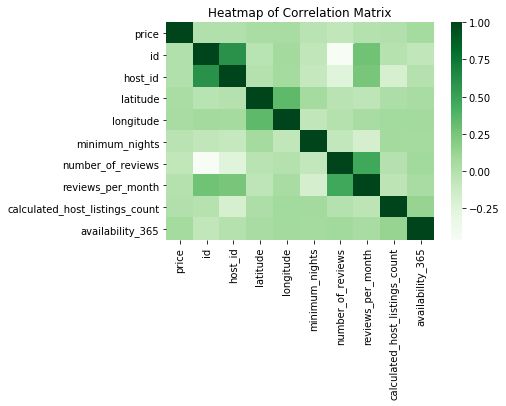

In [14]:
#Correlation Matrix
corr = Bronx_df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Greens")
plt.title('Heatmap of Correlation Matrix')
corr

### 3c. Distribution Plots

#### Summary
Lets look at box plots of prices by neighborhood.  The box plots below show the IQR of each neighborhood to be fairly close to one another.

#### Stop and Think
There are outliers withing each neighborhood.  Could these be properties of opportunity?

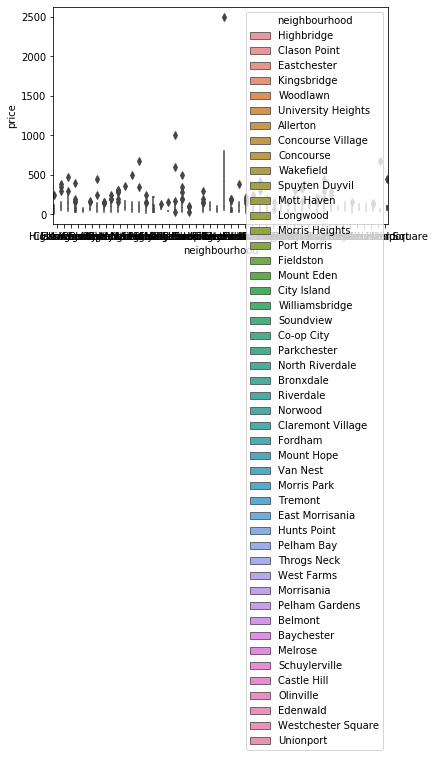

In [15]:
sns.boxplot(x="neighbourhood", y="price", hue="neighbourhood", data=Bronx_df)